# <font>2.Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location</font>

In [ ]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1729522800,
            "main": {
                "temp": 286.79,
                "feels_like": 286.82,
                "temp_min": 286.79,
                "temp_max": 288.02,
                "pressure": 1028,
                "sea_level": 1028,
                "grnd_level": 961,
                "humidity": 100,
                "temp_kf": -1.23
            },
            "weather": [
                {
                    "id": 500,
                    "main": "Rain",
                    "description": "light rain",
                    "icon": "10d"
                }
            ],
            "clouds": {
                "all": 100
            },
            "wind": {
                "speed": 0.85,
                "deg": 358,
                "gust": 1.33
            },
            "visibility": 2736,
            "pop": 0.2,
            "rain": {
                "3h": 0.12
            },
       

In [ ]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-10-21 15:00:00'

# 3.Extract relevant weather attributes such as temperature, humidity, wind speed, and  precipitation from the API response

In [ ]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']
    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head()


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,286.45,100,0.76,overcast clouds,2024-10-21 15:00:00,2024-10-21,15:00:00
1,286.25,98,0.21,overcast clouds,2024-10-21 18:00:00,2024-10-21,18:00:00
2,285.95,96,0.39,overcast clouds,2024-10-21 21:00:00,2024-10-21,21:00:00
3,284.92,93,0.80,broken clouds,2024-10-22 00:00:00,2024-10-22,00:00:00
4,284.40,93,0.73,scattered clouds,2024-10-22 03:00:00,2024-10-22,03:00:00


In [ ]:
data_df.shape

(40, 7)

# 4.Clean and preprocess the retrieved data, handling missing values or inconsistent  formats.

In [ ]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


# 5.Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [ ]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,285.925000,95.550000,0.713750
std,1.015144,4.640679,0.363464
min,284.360000,78.000000,0.060000
25%,285.172500,94.000000,0.420000
50%,285.825000,97.000000,0.695000
75%,286.257500,98.250000,0.860000
max,289.330000,100.000000,1.530000


# <font>6.Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.</font>

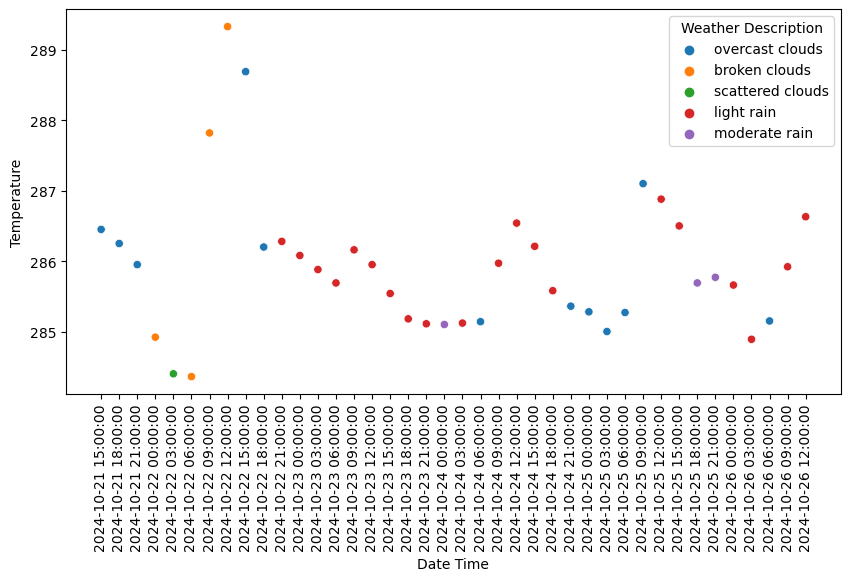

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

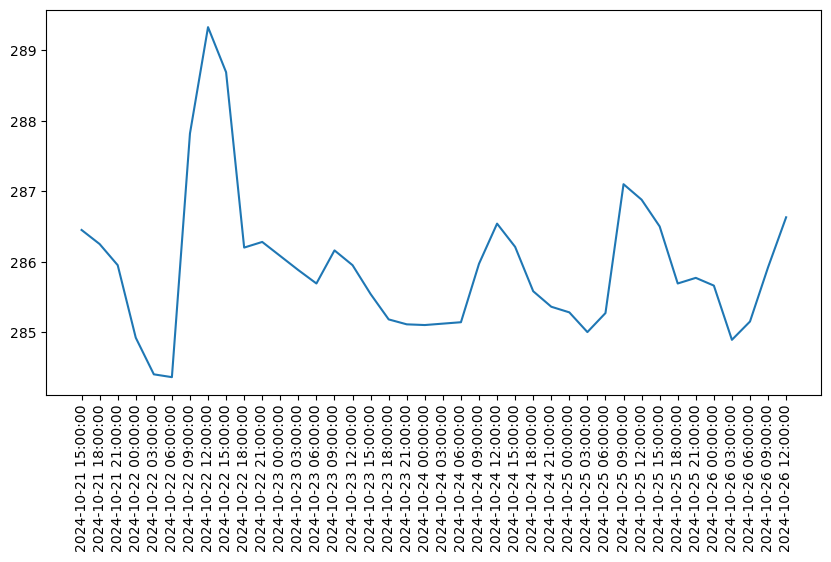

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Temperature'])
plt.xticks(rotation=90);

# <font>7.Apply data aggregation techniques to summarize weather statistics by specific time periods</font>                              

In [ ]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-10-21,286.216667,0.453333
2024-10-22,286.500000,0.861250
2024-10-23,285.698750,0.950000
2024-10-24,285.627500,0.728750
2024-10-25,285.936250,0.421250
2024-10-26,285.650000,0.700000


In [ ]:
data_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Weather Description',
       'Date Time', 'Date', 'Time'],
      dtype='object')

# <font>9.Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.</font>

<Axes: >

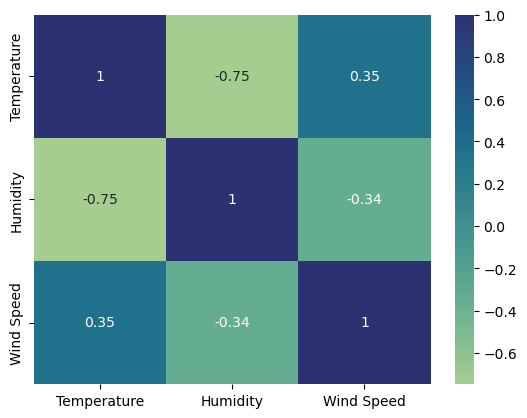

In [ ]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')